# Problem 3.2 of FVMHP

Partial Python solution to Problem 3.2 of *Finite Volume Methods for Hyperbolic Problems*.

In [1]:
%matplotlib inline

In [2]:
from pylab import *
from numpy.linalg import eig, solve

In [3]:
def plot_pt(q, label, color='b'):
    plot([q[0]], [q[1]], 'o', color=color, label=label)

In [21]:
def solve_Rp(A,ql,qr):
    """
    Solve the Riemann problem for a 2x2 matrix A and given left and right states.
    """
    
    print('Matrix A:\n', A)
    
    # compute eigenvalues and vectors:
    evals, R = eig(A)
    
    # reorder if necessary so evals[0] <= evals[1]
    jorder = argsort(evals)  # indices in order needed to sort
    evals = evals[jorder]
    R = R[:,jorder]
    
    print('Eigenvalues of A:', evals)
    print('Matrix R of eigenvectors:\n',R)
    
    # check that problem is hyperbolic:
    assert isreal(evals).all(), '*** Eigenvalues are not real'
    condR = cond(R)
    print('Condition number of R is %g' % condR)
    assert cond(R) < 1e12, '*** Matrix probably is not diagonalizable'

    dq = qr - ql
    alpha = solve(R, dq)
    qm = ql + alpha[0]*R[:,0]
    
    print('alpha = ', alpha)
    print('qm = ', qm)
    
    figure(figsize=(6,5))
    plot_pt(ql,'ql','r')
    plot_pt(qr,'qr','g')
    plot_pt(qm,'qm','b')
    plot((ql[0],qm[0],qr[0]), (ql[1],qm[1],qr[1]), 'b')
    legend()
    grid(True)
    xlabel('first component of q')
    ylabel('second component of q')
    title('phase plane solution of Riemann problem')
    show()
    
    # plot solutions for each component of q at time t:
    def sol(x,t):
        return ql + R[:,0]*alpha[0]*(x > t*evals[0]) + R[:,1]*alpha[1]*(x > t*evals[1])
    t = 1.0
    xs = linspace(evals[0]*t-1,evals[1]*t+1,1000)
    plot(xs, [sol(x,t)[0] for x in xs], 'r', label='q1')
    plot(xs, [sol(x,t)[1] for x in xs], 'g', label='q2')
    xlabel('x')
    ylabel('q')
    title(f'solutions of Riemann problem at t = {t}')
    legend()
    show()
    
    return qm


### Problem 3.1

Matrix A:
 [[1 1]
 [1 1]]
Eigenvalues of A: [0. 2.]
Matrix R of eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Condition number of R is 1
alpha =  [-0.70710678  0.70710678]
qm =  [ 1.5 -0.5]


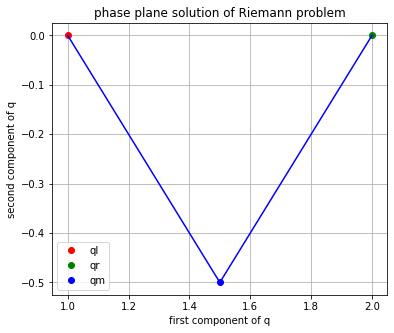

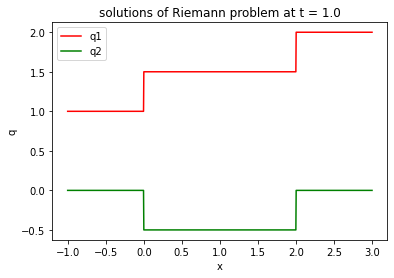

Matrix A:
 [[2 0]
 [0 2]]
Eigenvalues of A: [2. 2.]
Matrix R of eigenvectors:
 [[1. 0.]
 [0. 1.]]
Condition number of R is 1
alpha =  [ 1. -1.]
qm =  [1. 1.]


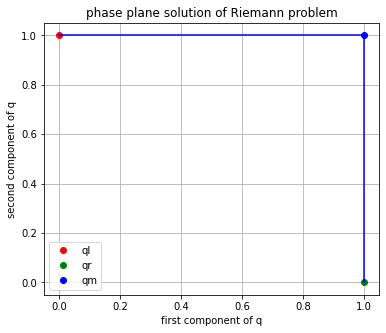

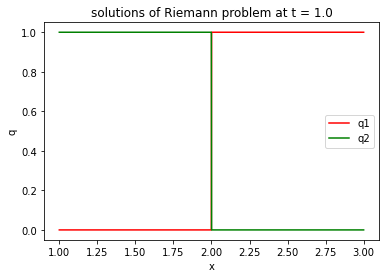

Matrix A:
 [[2.e+00 1.e+00]
 [1.e-04 2.e+00]]
Eigenvalues of A: [1.99 2.01]
Matrix R of eigenvectors:
 [[-0.99995    0.99995  ]
 [ 0.0099995  0.0099995]]
Condition number of R is 100
alpha =  [-50.50252494 -49.50247494]
qm =  [50.5    0.495]


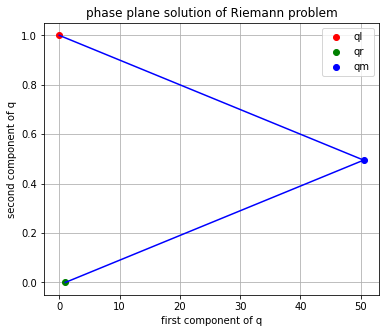

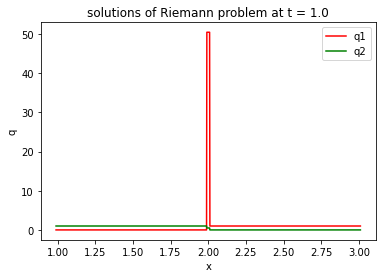

In [23]:
# part d
A = array([[1,1],[1,1]])
qleft = array([1,0])
qright = array([2,0])
qm = solve_Rp(A,qleft,qright)

# part e
A = array([[2,0],[0,2]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

# part а
A = array([[2,1],[0.0001,2]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

### Problem 3.3

In [54]:
def solve_Rp_noplot(A,ql,qr):
    """
    Solve the Riemann problem for a nxn matrix A and given left and right states.
    """
    
    print('Matrix A:\n', A)
    
    # compute eigenvalues and vectors:
    evals, R = eig(A)
    
    # reorder if necessary so evals[0] <= evals[1]
    jorder = argsort(evals)  # indices in order needed to sort
    evals = evals[jorder]
    R = R[:,jorder]
    
    print('Eigenvalues of A:', evals)
    print('Matrix R of eigenvectors:\n',R)
    
    # check that problem is hyperbolic:
    assert isreal(evals).all(), '*** Eigenvalues are not real'
    condR = cond(R)
    print('Condition number of R is %g' % condR)
    assert cond(R) < 1e12, '*** Matrix probably is not diagonalizable'

    dq = qr - ql
    alpha = solve(R, dq)
    
    print('alpha = ', alpha)
    
    solutions = [ql + sum(R[:,i]*alpha[i] for i in range(r)) for r in range(len(evals)+1)]
    print(f"solutions: {solutions}")

    return evals, solutions
    

Matrix A:
 [[0 0 4]
 [0 1 0]
 [1 0 0]]
Eigenvalues of A: [-2.  1.  2.]
Matrix R of eigenvectors:
 [[-0.89442719  0.          0.89442719]
 [ 0.          1.          0.        ]
 [ 0.4472136   0.          0.4472136 ]]
Condition number of R is 2
alpha =  [1.11803399 3.         1.11803399]
solutions: [array([1, 2, 0]), array([0. , 2. , 0.5]), array([0. , 5. , 0.5]), array([1., 5., 1.])]


C:\Users\Math User\AppData\Local\Temp\ipykernel_18744\4169993579.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  solutions = [ql + sum(R[:,i]*alpha[i] for i in range(r)) for r in range(len(evals)+1)]


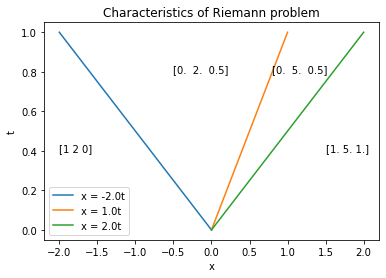

Matrix A:
 [[1 0 2]
 [0 2 0]
 [0 0 3]]
Eigenvalues of A: [1. 2. 3.]
Matrix R of eigenvectors:
 [[1.         0.         0.70710678]
 [0.         1.         0.        ]
 [0.         0.         0.70710678]]
Condition number of R is 2.41421
alpha =  [0.         2.         2.82842712]
solutions: [array([1, 1, 1]), array([1., 1., 1.]), array([1., 3., 1.]), array([3., 3., 3.])]


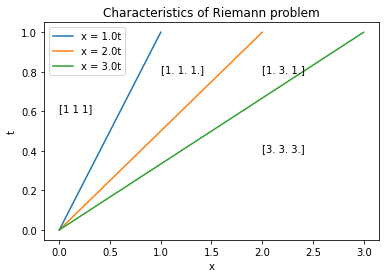

In [58]:
A = array([[0,0,4],[0,1,0],[1,0,0]])
ql = array([1,2,0])
qr = array([1,5,1])
evals, solutions = solve_Rp_noplot(A,ql,qr)

# plot characteristic wedges:
ts = linspace(0,1,10)
for (i, eval) in enumerate(evals):
    plot([t*eval for t in ts], ts, label=f'x = {round(eval, 2)}t')
annotate(f'{solutions[0]}', xy=(-2, 0.4))
annotate(f'{solutions[1]}', xy=(-0.5, 0.8))
annotate(f'{solutions[2]}', xy=(0.8, 0.8))
annotate(f'{solutions[3]}', xy=(1.5, 0.4))
xlabel('x')
ylabel('t')
title(f'Characteristics of Riemann problem')
legend()
show()

A = array([[1,0,2],[0,2,0],[0,0,3]])
ql = array([1,1,1])
qr = array([3,3,3])
evals, solutions = solve_Rp_noplot(A,ql,qr)

# plot characteristic wedges:
ts = linspace(0,1,10)
for (i, eval) in enumerate(evals):
    plot([t*eval for t in ts], ts, label=f'x = {round(eval, 2)}t')
annotate(f'{solutions[0]}', xy=(0, 0.6))
annotate(f'{solutions[1]}', xy=(1, 0.8))
annotate(f'{solutions[2]}', xy=(2, 0.8))
annotate(f'{solutions[3]}', xy=(2, 0.4))
xlabel('x')
ylabel('t')
title(f'Characteristics of Riemann problem')
legend()
show()